In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# ___Logistic Regression___
-------------

In [10]:
# Logistic regression, despite being called a regression, is actually a classification method.
# Logistic regression can be seen as a generalized linear model.
# Unlike ordinary least squares regression models, the target values of logistic regression is a binary variable.

In [11]:
# There are variants of logistic regression that can be used with targets involving multiple classes instead of binary ones.

In [12]:
# Linear regression predicts the output y, based on a weighted sum of input variables.
# Say that we have inputs x0, x1 & x3 and weights w0, w1 & w2 and the bias term b

# y = x0.w0 + x1.w1 + x2.w2 + b

# Since b is a constant term for a given state of a model, we could depict b as a coefficient (weight) of a feature that 
# has ones for values.

# Logistic regression follows these steps until the determination of w and b terms.
# Then, it passes the weights and bias through a non-linear logistic function f, to produce the output y. (y is a binary variable)

In [13]:
# Output of f gets closer to 1, as inputs increase above 0 and gets closer to 0, as the inputs decrease below 0.
# The role of this non-linear function is to compress the weights and bias into a single binary scalar value. (0 or 1)

# ___$y\in (0, 1)$___

In [4]:
# Since the job of a basic logistic regression model is to predict a binary output value, this can be used in classification.
# Lets say that we have two input values and we could map the binary output to the classes (2)

In [ ]:
# E.g. suppose we need to predict whether a student will pass finals based on the number of hours spent studying.
# Students who are predicted to fail the exam are assigned to the negative class (0) and the ones who are predicted to pass the exam are 
# assigned to the positive class. (1)

In [13]:
nhours = np.random.randint(0, 100, size = 150)

In [16]:
rpreds = list(map(lambda x: 1 if x >= 50 else 0, nhours))
color = list(map(lambda x: "red" if x == 1 else "green", rpreds))

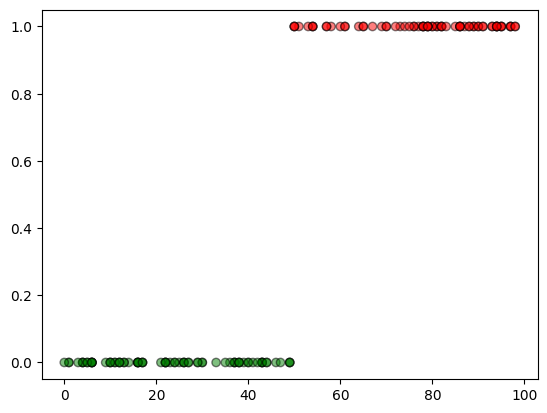

In [19]:
plt.scatter(nhours, rpreds, c = color, edgecolor = "black", alpha = 0.5)
plt.show()

In [20]:
# Using logistic regression, we can estimate model coefficients w_hat & b_hat.
# Once the model coefficients have been estimated, we now have a formula in hand that we could use to determine the probability of 
# a student passing the finals given the number of hours he/she spent studying.

In [21]:
# Students who have a predicted y_hat > 0.5 are allotted in the positive class and the remainder is grouped in the negative class.

## ___Logistic Regression for Binary Classification___
------------

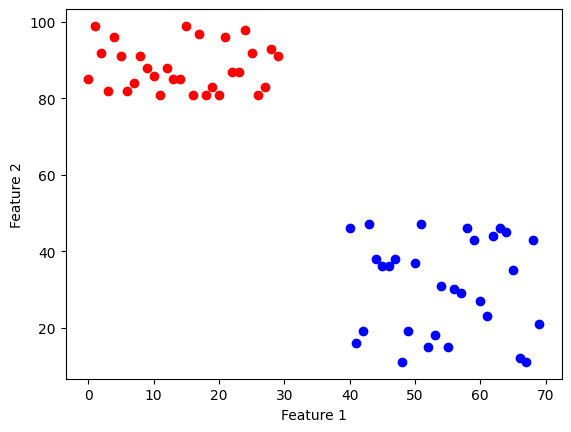

In [32]:
y1 = np.random.randint(80, 100, size = 30)
y2 = np.random.randint(10, 50, size = 30)

x1 = np.arange(0, 30, 1)
x2 = np.arange(40, 70, 1)

z1 = np.zeros(shape = 30)
z2 = np.ones(shape = 30)

plt.plot(x1, y1, marker = "o", linestyle = "none", color = "red")
plt.plot(x2, y2, marker = "o", linestyle = "none", color = "blue")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [9]:
# Points in cyan have higher Feature 2 values but lower Feature 1 values.
# Conversely, points in yellow have lower Feature 2 values but higher Feature 1 values.

In [21]:
# Now we can introduce another axis (z) that represents the probability of a point belonging to the positive class.
# Let's say that the blue points belong to the positive class and the red points to the negative class.

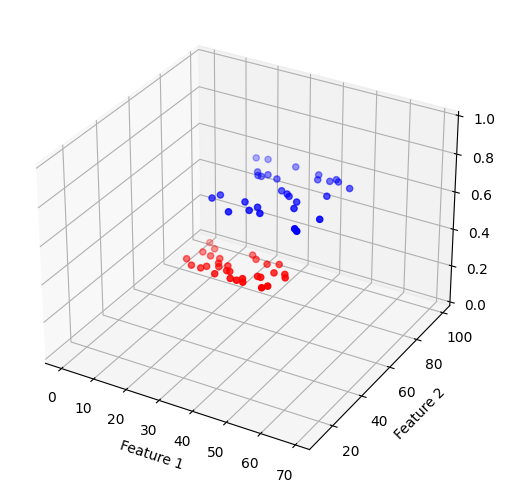

In [60]:
fig = plt.figure(figsize = (5, 5))
axes = fig.add_subplot(projection = "3d")
axes.scatter3D(x1, y1, zs = z1, color = "red")
axes.scatter3D(x2, y2, zs = z2, color = "blue")
# axes.plot_surface(x1, y1, np.repeat(0.5, 30))
axes.set_zlim(0, 1)
axes.set_xlabel("Feature 1")
axes.set_ylabel("Feature 2")
plt.tight_layout()
plt.show()

In [61]:
# The logistic function we have here is a function of two inputs not just one.
# Once this logistic function has been estimated from the training data, we could use it to predict classes of any data points.

In [ ]:
# If we draw a plane y = 0.5 in the three dimensional space above, 
# All points that have a y = 0.5 lie along a straight line.
# This indicates that logistic regression gives us a linear decision boundary between the classes.

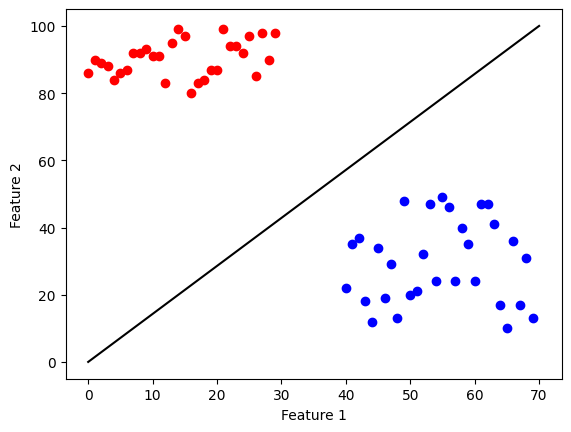

In [68]:
y1 = np.random.randint(80, 100, size = 30)
y2 = np.random.randint(10, 50, size = 30)

x1 = np.arange(0, 30, 1)
x2 = np.arange(40, 70, 1)

plt.plot(x1, y1, marker = "o", linestyle = "none", color = "red")
plt.plot(x2, y2, marker = "o", linestyle = "none", color = "blue")
plt.plot([0, 70], [0, 100], color = "black")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [70]:
# Points with y >= 0.5 in the logistic function (positive class) lie right to the decision boundary.
# Points with y < 0.5 in logistic regression lie left to the boundary.

In [3]:
prev_year_scores = np.random.randint(10, 100, size = 1000)
nhours = prev_year_scores + np.random.normal(loc = 2.5, scale = 5.675, size = 1000)          # adding some noise.
results = np.array([1 if prev_year_scores[i] + nhours[i] > 140 else 0 for i in range(1000)])

In [4]:
results.mean()

0.353

In [5]:
results.shape

(1000,)

In [6]:
feats = np.column_stack([prev_year_scores, nhours])

In [7]:
train_x, test_x, train_y, test_y = train_test_split(feats, results, train_size = 0.78)

In [25]:
logReg = LogisticRegression(max_iter = 1000, C = 100).fit(train_x, train_y)

In [26]:
logReg.coef_

array([[8.58316655, 8.47555533]])

In [27]:
logReg.intercept_

array([-1193.64598847])

In [28]:
# WOW!
logReg.score(test_x, test_y)

1.0

In [29]:
logReg.classes_

array([0, 1])

In [30]:
logReg.predict(test_x)

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [31]:
# probability of the data points being in the positive class.
logReg.predict_proba(test_x)[:, 1]

array([0.00000000e+000, 1.00000000e+000, 0.00000000e+000, 5.32230144e-225,
       6.06706243e-041, 1.04508811e-114, 1.21356221e-164, 0.00000000e+000,
       1.00000000e+000, 0.00000000e+000, 1.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 1.49646650e-269, 5.85911073e-298, 1.03897966e-233,
       0.00000000e+000, 1.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       2.17539418e-207, 1.00000000e+000, 1.00000000e+000, 2.27700783e-080,
       5.91043018e-156, 1.29208574e-012, 6.83764192e-242, 6.63106900e-153,
       1.00000000e+000, 1.48922896e-245, 4.33339276e-051, 0.00000000e+000,
       1.00000000e+000, 6.39765964e-026, 3.74780409e-245, 0.00000000e+000,
       1.00000000e+000, 2.29200463e-111, 0.00000000e+000, 0.00000000e+000,
       8.17261089e-110, 1.16612645e-035, 1.98329497e-040, 1.00000000e+000,
       1.36617312e-210, 1.00000000e+000, 0.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 2.10092337e-268, 3.02721074e-158, 0.00000000e+000,
       9.17407837e-132, 1

## ___Logistic Regression & Regularization___
----------------

In [32]:
# L2 regularization is an intrinsic part of logistic regression.
# The parameter C (!= alpha) controls the degree of regularization.
# Like regularized linear regression, it can be sometimes mundane to normalize (scale) the features to augment them on the same scale.

### ___Note that for SVMs and logistic regression models higher values of C correspond to smaller regularization.___

In [33]:
# With smaller C values, the model tries to find coefficients closer to 0, at the expense of poor model accuracy.
# With larger C values, model prioritizes model accuracy over regularization.

In [48]:
for i in np.arange(1, 10000, 250):
    logReg = LogisticRegression(C = i, max_iter = 1000).fit(train_x, train_y)
    print(f"C: {i:4}, Coefficients: {logReg.coef_[0][0]:.4f}, {logReg.coef_[0][1]:.4f}, R2 score: {logReg.score(test_x, test_y)}")

C:    1, Coefficients: 1.4290, 1.5187, R2 score: 1.0
C:  251, Coefficients: 13.8089, 13.6079, R2 score: 1.0
C:  501, Coefficients: 19.2783, 18.9825, R2 score: 1.0
C:  751, Coefficients: 22.8840, 22.5256, R2 score: 1.0
C: 1001, Coefficients: 25.5785, 25.1731, R2 score: 1.0
C: 1251, Coefficients: 27.7371, 27.2941, R2 score: 1.0
C: 1501, Coefficients: 29.5422, 29.0675, R2 score: 1.0
C: 1751, Coefficients: 31.0961, 30.5942, R2 score: 1.0
C: 2001, Coefficients: 32.4619, 31.9360, R2 score: 1.0
C: 2251, Coefficients: 33.6814, 33.1341, R2 score: 1.0
C: 2501, Coefficients: 34.7837, 34.2170, R2 score: 1.0
C: 2751, Coefficients: 35.7901, 35.2057, R2 score: 1.0
C: 3001, Coefficients: 36.7163, 36.1156, R2 score: 1.0
C: 3251, Coefficients: 37.5745, 36.9587, R2 score: 1.0
C: 3501, Coefficients: 38.3744, 37.7444, R2 score: 1.0
C: 3751, Coefficients: 39.1235, 38.4803, R2 score: 1.0
C: 4001, Coefficients: 39.8281, 39.1724, R2 score: 1.0
C: 4251, Coefficients: 40.4933, 39.8259, R2 score: 1.0
C: 4501, Coe